# Testing Feedforward Neural Network


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from NeuralNet import NeuralNet

2023-04-05 15:30:24.501668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Basic Test (If sum of `N` random numbers between 0 - 1 is greater than `N / 2`)


**Specifying Network layout and training/testing data**


In [2]:
NPL = [4, 10, 10, 10, 1]
train_x = np.array([np.random.rand(NPL[0]) for _ in range(5000)], dtype=np.float32)
train_y = np.array([int(np.sum(x) > NPL[0] / 2) for x in train_x], dtype=np.float32)

test_x = np.random.rand(NPL[0]).astype(np.float32)
test_y = np.array(int(np.sum(test_x) > NPL[0] / 2), dtype=np.float32)


**Training Network**


In [3]:
net = NeuralNet(NPL=NPL, learning_rate=0.3)
net.train(train_x, train_y, epochs=10)


Epoch[0]: Loss = 0.2556924164518714
Epoch[1]: Loss = 0.25365089032649996
Epoch[2]: Loss = 0.2531499320715666
Epoch[3]: Loss = 0.25285454088896514
Epoch[4]: Loss = 0.2523579186052084
Epoch[5]: Loss = 0.25027655212581157
Epoch[6]: Loss = 0.15736205625440436
Epoch[7]: Loss = 0.03569793273708195
Epoch[8]: Loss = 0.028316391265706623
Epoch[9]: Loss = 0.025657523767414432


**Testing Network**


In [4]:
net.activations[0] = test_x
net.forward_prop()
test_loss = net.calculate_loss(test_y)

print(
    f"Sum of testing data ({np.sum(test_x)}) is {'greater' if test_y else 'less'} than {NPL[0] / 2}"
)
print(f"Expected output is {test_y}")
print(f"Network predicted: {net.activations[-1][0]}, with a loss of {test_loss}")


Sum of testing data (1.5264286994934082) is less than 2.0
Expected output is 0.0
Network predicted: 7.326510967686772e-05, with a loss of 5.367776445552863e-09


### MNIST test


**Loading MNIST Data**


In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flattening image and converting range to 0.0 -> 1.0
train_X = (train_X / 255).reshape((60000, 784)).astype(np.float32)
test_X = (test_X / 255).reshape((10000, 784)).astype(np.float32)

# One-hot encoding labels
train_y = np.eye(10, dtype=np.float32)[train_y]
test_y = np.eye(10, dtype=np.float32)[test_y]


**Training Network**


In [6]:
NPL = [784, 100, 100, 10]

net = NeuralNet(NPL=NPL, learning_rate=0.3)
net.train(train_X, train_y, epochs=20)


Epoch[0]: Loss = 0.013427510760722721
Epoch[1]: Loss = 0.006347791628227496
Epoch[2]: Loss = 0.004592710906769356
Epoch[3]: Loss = 0.0036459444068689642
Epoch[4]: Loss = 0.0030611378092877672
Epoch[5]: Loss = 0.0025926880138376542
Epoch[6]: Loss = 0.002238838584371966
Epoch[7]: Loss = 0.0020081771895305565
Epoch[8]: Loss = 0.0017730746846103464
Epoch[9]: Loss = 0.0016513852206936571
Epoch[10]: Loss = 0.001552645138848245
Epoch[11]: Loss = 0.0012952627498335856
Epoch[12]: Loss = 0.0011823291090484285
Epoch[13]: Loss = 0.0010907155437456543
Epoch[14]: Loss = 0.0010171154003573758
Epoch[15]: Loss = 0.0009621004832451727
Epoch[16]: Loss = 0.0008783538994963436
Epoch[17]: Loss = 0.0008652124586280708
Epoch[18]: Loss = 0.000801861934909756
Epoch[19]: Loss = 0.0007347340557508302


**Testing Network**


Expected output is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Network predicted: [4.49992949e-04 2.52325028e-09 9.96403098e-01 2.48384924e-04
 3.30168337e-09 1.19687265e-08 6.88037076e-08 3.58663558e-04
 1.45056460e-04 1.24120504e-07], with loss of 1.3351572763703408e-06


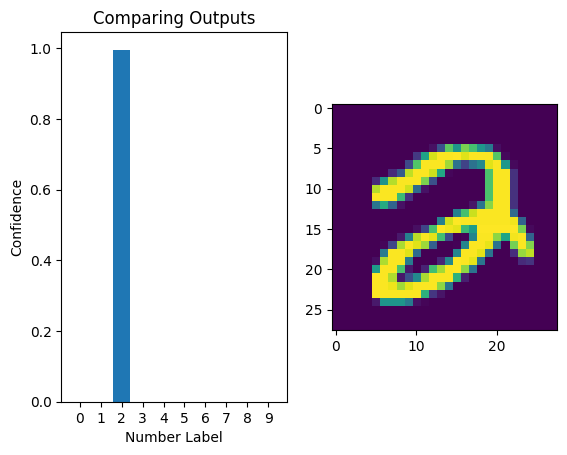

In [16]:
TEST_EXAMPLE: int = 9954

net.activations[0] = test_X[TEST_EXAMPLE]
net.forward_prop()
test_loss = net.calculate_loss(test_y[TEST_EXAMPLE])

fig, axs = plt.subplots(1, 2)
axs[0].bar(x=[str(x) for x in range(10)], height=net.activations[-1])
axs[0].set_title("Comparing Outputs")
axs[0].set_ylabel("Confidence")
axs[0].set_xlabel("Number Label")

axs[1].imshow(test_X[TEST_EXAMPLE].reshape((28, 28)))

print(f"Expected output is {test_y[TEST_EXAMPLE]}")
print(f"Network predicted: {net.activations[-1]}, with loss of {test_loss}")
